In [1]:
import torch

In [7]:
x = torch.arange(5.0, requires_grad=True)
x

tensor([0., 1., 2., 3., 4.], requires_grad=True)

In [8]:
y = x*x
y.backward(gradient=torch.ones(len(x)))
x.grad

tensor([0., 2., 4., 6., 8.])

In [12]:
x.grad.zero_()
y = x*x
y.sum().backward()
x.grad

tensor([0., 2., 4., 6., 8.])

In [2]:
# 生成数据
def normal_data(w, b, n):
    x = torch.normal(0, 1, (n, len(w)))
    y = torch.matmul(x, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return x, y.reshape((-1, 1))

import random
# 批数据
def batch_data(x, y, batch_size):
    n = len(x)
    indexs = list(range(n))
    random.shuffle(indexs)
    for i in range(0, n, batch_size):
        batch_indexs = torch.tensor(
            indexs[i: min(i+batch_size, n)]
        )
        yield x[batch_indexs], y[batch_indexs]

# 定义模型
def linreg(w, b, x):
    return torch.matmul(x, w) +b

# 损失函数
def squared_loss(y, y_hat):
    return (y.reshape(y_hat.shape)-y_hat)**2/2

# sgd
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr*param.grad/batch_size
            param.grad.zero_()

In [3]:
# 生成数据
n = 1000
w = torch.tensor([4.5, 6])
b = torch.tensor([1.7])
x,y = normal_data(w,b,n)

In [8]:
lr = 0.03
num_epochs = 10
net = linreg
loss = squared_loss

In [9]:
batch_size = 50
w = torch.normal(0, 1, [2, 1], requires_grad=True)
b = torch.tensor([0.0], requires_grad=True)
trainer = torch.optim.SGD([w,b], lr=lr)

In [10]:
for i in range(num_epochs):
    for x_batch, y_batch in batch_data(x, y, batch_size):
        l = loss(y_batch, net(w, b, x_batch))
        # trainer.zero_grad()
        l.sum().backward()
        # trainer.step()
        sgd([w, b], lr, batch_size)
    l = loss(y, net(w ,b, x))
    print('epoch:{},loss:{}'.format(i, l.mean()))

epoch:0,loss:8.494657516479492
epoch:1,loss:2.2324373722076416
epoch:2,loss:0.5904510021209717
epoch:3,loss:0.1573556810617447
epoch:4,loss:0.04228285327553749
epoch:5,loss:0.01147698424756527
epoch:6,loss:0.003165672766044736
epoch:7,loss:0.0009083320619538426
epoch:8,loss:0.00028945755911991
epoch:9,loss:0.00011882313992828131


In [11]:
w, b

(tensor([[4.4979],
         [5.9894]], requires_grad=True),
 tensor([1.6971], requires_grad=True))

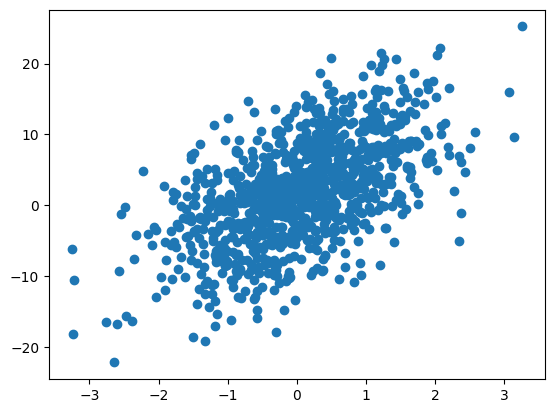

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x[:,0], y)

In [39]:
for x_batch,y_batch in batch_data(x, y, batch_size):
    print(x_batch.shape)
    break

torch.Size([50, 2])
